# Youtube Video Analysis

# Initial Data Cleaning
1) Using json file to add the category column to the data replacing the category Id column

2) Check the data types of all the variable if they are appropriate for analysis

3) Converting the two columns publishedAt and trending_date to datetime

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"

# Framing Questions for Analysis
Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments

Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well

Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)

What's the average time taken for a video to be in trending categorically?

What's the average no.of views required to enter into trending?

Which Youtube channel in India has more videos in Trending?

Understanding the significance of Likes,Dislikes and Comments.

# FURTHER ANALYSIS :: Student Assignment
1) Which category of videos have comments disabled ?

2) Which category of videos have ratings disabled ?

3) Most watched video in India overall | Year wise | Category wise

4) Yearwise number of Videos published which were trending

5) Distributions of Numerical Columns

6) View the correlations between the numerical variables

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Import datasets 

In [2]:
# Import categories dataset
categories = pd.read_json("IN_category_id.json")
categories

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [3]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [4]:
# Create dictionary for every category of the dataset
category_dict = {}

for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']
    
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [5]:
# Read the second dataset
df = pd.read_csv('IN_youtube_trending_data.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152588,P1sAzjdFaAQ,I STARTED A CONSTRUCTION COMPANY,2022-10-06T03:30:06Z,UCX8pnu3DYUnx8qy8V_c6oHg,Techno Gamerz,20,2022-10-10T00:00:00Z,construction simulator|building|repairing|funn...,4658519,305976,0,13257,https://i.ytimg.com/vi/P1sAzjdFaAQ/default.jpg,False,False,I STARTED A CONSTRUCTION COMPANYSubscribe to o...
152589,wNNM525464o,Gabbar ने दिया Hospital चलने वालों को मुंहतोड़...,2022-10-04T05:30:18Z,UCs56ffejFhWlCvlvRIdpb9Q,Viacom18 Studios,24,2022-10-10T00:00:00Z,gabbar is back|gabbar is back hindi movie|gabb...,900992,8781,0,77,https://i.ytimg.com/vi/wNNM525464o/default.jpg,False,False,Gabbar ने दिया Hospital चलने वालों को मुंहतोड़...
152590,dsy0ogwdiZg,Ekkar Banegi Body Part 1 | Gym | ibrahim 420,2022-10-04T14:31:39Z,UCX3bjUJ8bPOAZqcaP-XCSTw,Ibrahim 420,23,2022-10-10T00:00:00Z,ibrahim 420|ibrahim420|ibrahim 420 new video|a...,599175,36900,0,1302,https://i.ytimg.com/vi/dsy0ogwdiZg/default.jpg,False,False,https://probo-in.onelink.me/1kre/ibrahim420oct...
152591,hQRxcSDRnWw,Shakti | शक्ति | Ep. 611 | Harman Is Attacked,2022-10-08T10:30:58Z,UCyfkoMQeJOoEt3ZhY3PI6Uw,Colors Rishtey,24,2022-10-10T00:00:00Z,Shakti|shakti serial|shakti Vivian De Sena|sha...,557794,5766,0,80,https://i.ytimg.com/vi/hQRxcSDRnWw/default.jpg,False,False,To download the Voot app please click on the l...


In [6]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

Now we are going to verify the no. of records for a specific video

In [8]:
#Verification of the record 'Iot0eF6EoNA'
df[df.video_id == 'Iot0eF6EoNA']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
171,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-13T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,28165455,412594,7576610,659733,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
348,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-14T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,39577543,509684,9260973,818229,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
523,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-15T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,48458719,569806,10479328,926675,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
697,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-16T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,53865934,605119,11213118,981278,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
894,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-17T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,57978838,629440,11318674,1015427,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1099,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-18T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,60684140,645367,11610617,1033525,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1313,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-19T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,62560202,657374,11828671,1043781,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1548,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-20T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,64126227,667503,12066691,1057203,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1809,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-21T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,65454611,675091,12237370,1070532,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...


Details inferred:
1. The same video can be multiple times in the dataset
2. Likes, dislikes, etc are duplicated because videos can be multiple times in trending

*Drop the columns that we are not going to use*

In [9]:
# Drop columns 'channelId' and 'thumbnail_link'
df.drop(['channelId', 'thumbnail_link'], inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelTitle       152592 non-null  object
 4   categoryId         152593 non-null  int64 
 5   trending_date      152593 non-null  object
 6   tags               152593 non-null  object
 7   view_count         152593 non-null  int64 
 8   likes              152593 non-null  int64 
 9   dislikes           152593 non-null  int64 
 10  comment_count      152593 non-null  int64 
 11  comments_disabled  152593 non-null  bool  
 12  ratings_disabled   152593 non-null  bool  
 13  description        135820 non-null  object
dtypes: bool(2), int64(5), object(7)
memory usage: 14.3+ MB


Now we will sort the data with the 'view_count' variable

In [10]:
# Max no. of views
df_MaxViews = df.sort_values('view_count', ascending = False).drop_duplicates(['view_count'])
df_MaxViews.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3371,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-29T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,244507902,15948359,738811,6188781,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3122,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735551,714196,6064883,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2892,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460834,674291,5810606,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...


In [11]:
# Min no. of views
df_MinViews = df.sort_values('view_count', ascending = True).drop_duplicates(['view_count'])
df_MinViews.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
47639,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,GoogleDoodles,1,2021-04-27T00:00:00Z,[None],0,0,0,0,True,True,This year’s annual Earth Day Doodle highlights...
17317,hHvXxuB2pNU,IPL 2020 | IPL 2020 Important 40 Question | Dr...,2020-11-11T00:30:05Z,Study In Hindi,27,2020-11-11T00:00:00Z,study in hindi|IPL 2020 IPL 2020 Important 40 ...,15402,2099,30,84,False,False,#IPL_2020 #Mumbai_Won_2020IPL #40_MCQsIPL 2020...
2760,tNSmXwfTrAk,FDC & SDC ಪರೀಕ್ಷೆಗಳ ಕುರಿತು ಹೊರಬಂತು ಪ್ರಮುಖವಾದ ಮ...,2020-08-25T12:06:38Z,ಉದ್ಯೋಗ ಮಿತ್ರ,27,2020-08-26T00:00:00Z,[None],16775,785,47,85,False,False,https://t.me/udyogamitrakarnataka
2548,PixCGXgD0vc,સંઘપ્રદેશ દાનહ દમણ દિવની બોર્ડર હવે લોકો માટે ...,2020-08-24T15:31:18Z,janmanch daman,25,2020-08-25T00:00:00Z,[None],17351,453,22,18,False,False,NaN
65527,zib-ZTwDFHk,Guru Meri Pooja Guru Govind गुरु मेरी पूजा गुर...,2021-07-24T01:42:55Z,Nova Spiritual India,10,2021-07-24T00:00:00Z,guru meri pooja guru govind|guru mantra|guru m...,17711,382,16,27,False,False,Guru Meri Pooja Guru Govind गुरु मेरी पूजा गुर...


Lets have a total view of  a video being in trending

In [12]:
days_trending = dict(df.groupby('video_id')['view_count'].count())
days_trending

{'--9rRxqTdjQ': 4,
 '--GS_EPuuMc': 3,
 '--L_wDHUaxY': 4,
 '--WGlFF6-yw': 5,
 '--vmXGvtqxQ': 4,
 '--xmP5nOoLM': 1,
 '-00zRvr9zyA': 5,
 '-05Hay2JrKg': 1,
 '-0Da_UPrV10': 2,
 '-0PR_BkK60E': 1,
 '-0Qa7hB2vXI': 1,
 '-0SOJVfKX00': 5,
 '-0beFQnB5lY': 5,
 '-0gtaC4AzHA': 3,
 '-0ldvhBlL-k': 7,
 '-0oRa0QXx6I': 5,
 '-0udX1wZ82U': 2,
 '-0wc4B969z0': 4,
 '-13QFm5vAoY': 4,
 '-19EvIcr9ZA': 5,
 '-1EIBWRRj4U': 1,
 '-1ImKHHc7Ck': 5,
 '-1QZHe8x2G0': 6,
 '-1dLG2z61hQ': 2,
 '-1ddUMd4BRw': 2,
 '-1i1gagGtu4': 5,
 '-1kFl7EWFqs': 2,
 '-1lRI4dseeA': 2,
 '-1pQX88fnUQ': 5,
 '-28tVGVeM_Q': 3,
 '-29uvnpHjpI': 1,
 '-2CYiqoM3BA': 4,
 '-2DOCcpdTS0': 5,
 '-2RBOk_RzA0': 6,
 '-2RJTVPSOPc': 1,
 '-2WasASWxgo': 2,
 '-2_qmj_X04o': 3,
 '-2a-DFvWa0k': 3,
 '-2dqKYHewY0': 3,
 '-2draG1JbKA': 3,
 '-3AQa1eM_PU': 2,
 '-3A_ptUS5_g': 4,
 '-3HiGsaH4Ew': 5,
 '-3IcQ3RygGE': 2,
 '-3KzmJPgHu4': 3,
 '-3LbftaK6jM': 2,
 '-3XxzOSIvZ8': 5,
 '-3_fPBahI_0': 1,
 '-3z4u6AHBxg': 3,
 '-3zqU_Z6T3o': 4,
 '-47LcGA8Fp4': 4,
 '-4L_ZLzYdlU': 3,
 '-4escF5itQ

Let's add the categories into each dataframe we have done

In [13]:
# Funtion for adding it more effectibly
def categories_add(value):
    return categories['items'][value]['snippet']['title']

In [14]:
# Add categories into each df
df_MaxViews['video_category'] = df_MaxViews.categoryId.apply(categories_add)
df_MinViews['video_category'] = df_MinViews.categoryId.apply(categories_add)
df['video_category'] = df.categoryId.apply(categories_add)

# view results
df_MaxViews.head(5)
df_MinViews.head(5)


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_category
47639,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,GoogleDoodles,1,2021-04-27T00:00:00Z,[None],0,0,0,0,True,True,This year’s annual Earth Day Doodle highlights...,Autos & Vehicles
17317,hHvXxuB2pNU,IPL 2020 | IPL 2020 Important 40 Question | Dr...,2020-11-11T00:30:05Z,Study In Hindi,27,2020-11-11T00:00:00Z,study in hindi|IPL 2020 IPL 2020 Important 40 ...,15402,2099,30,84,False,False,#IPL_2020 #Mumbai_Won_2020IPL #40_MCQsIPL 2020...,Thriller
2760,tNSmXwfTrAk,FDC & SDC ಪರೀಕ್ಷೆಗಳ ಕುರಿತು ಹೊರಬಂತು ಪ್ರಮುಖವಾದ ಮ...,2020-08-25T12:06:38Z,ಉದ್ಯೋಗ ಮಿತ್ರ,27,2020-08-26T00:00:00Z,[None],16775,785,47,85,False,False,https://t.me/udyogamitrakarnataka,Thriller
2548,PixCGXgD0vc,સંઘપ્રદેશ દાનહ દમણ દિવની બોર્ડર હવે લોકો માટે ...,2020-08-24T15:31:18Z,janmanch daman,25,2020-08-25T00:00:00Z,[None],17351,453,22,18,False,False,NaN,Horror
65527,zib-ZTwDFHk,Guru Meri Pooja Guru Govind गुरु मेरी पूजा गुर...,2021-07-24T01:42:55Z,Nova Spiritual India,10,2021-07-24T00:00:00Z,guru meri pooja guru govind|guru mantra|guru m...,17711,382,16,27,False,False,Guru Meri Pooja Guru Govind गुरु मेरी पूजा गुर...,Comedy


Let's see the total count for each category

In [15]:
df.groupby('video_category').count()['view_count']

video_category
Anime/Animation          4191
Autos & Vehicles         3347
Classics                  956
Comedy                  28725
Drama                   25269
Family                  12640
Foreign                 58179
Horror                   4373
Music                     894
Sci-Fi/Fantasy           5029
Science & Technology       87
Shorts                   5286
Shows                      73
Thriller                 3544
Name: view_count, dtype: int64

In [16]:
df.video_category.value_counts()

Foreign                 58179
Comedy                  28725
Drama                   25269
Family                  12640
Shorts                   5286
Sci-Fi/Fantasy           5029
Horror                   4373
Anime/Animation          4191
Thriller                 3544
Autos & Vehicles         3347
Classics                  956
Music                     894
Science & Technology       87
Shows                      73
Name: video_category, dtype: int64

Let's convert date variables into correct format

In [17]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])
df.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,FoxStarHindi,24,2020-08-12 00:00:00+00:00,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Foreign
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-12 00:00:00+00:00,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Comedy
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Comedy
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10 05:30:49+00:00,T-Series,10,2020-08-12 00:00:00+00:00,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Comedy
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11 05:30:13+00:00,VYRLOriginals,10,2020-08-12 00:00:00+00:00,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Comedy


Verification for NULL values

In [18]:
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          16773
video_category           0
dtype: int64

Taking care of null values

In [19]:
# Null values in 'channelTitle'
df['channelTitle'] = df['channelTitle'].fillna('Other')

In [20]:
# Null values in 'description'
df['description'] = df['description'].fillna('No description provided')

In [21]:
# Verify null data again in df
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
video_category       0
dtype: int64

Finally, we're going to drop the duplicated titles

In [22]:
# Drop duplicated titles
df = df.drop_duplicates('title', keep = 'last')

## Analysis of the data
### 1. Channel with the most view count

In [23]:
# Reset all index
df_Views_Analysis = df_MaxViews.groupby('video_category')["view_count"].sum().reset_index()
df_Like = df_MaxViews.groupby('video_category')["likes"].sum().reset_index()
df_Dislike = df_MaxViews.groupby('video_category')["dislikes"].sum().reset_index()
df_Comments = df_MaxViews.groupby('video_category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,video_category,view_count,Likes,Dislikes
0,Anime/Animation,12186630680,369313527,8629613
1,Autos & Vehicles,12055118546,398793665,17947353
2,Classics,1511253586,112632252,1120720
3,Comedy,143340756819,8080245680,177051790
4,Drama,70895963599,4429654711,42096807
5,Family,37809207717,2692394026,35932244
6,Foreign,161792603376,7430412774,252917844
7,Horror,4662550702,93181650,11369553
8,Music,1474112665,76128518,1563769
9,Sci-Fi/Fantasy,8270798364,479289446,7909164


In [24]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()
channel_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
#RohiL Fitness Yug,17,743384,13186,1491,162,0,0
1 Million Views Tamil,352,32106174,2939399,13810,3485,0,0
1.1 Gaming,60,1757843,82112,7601,4425,0,0
10 Mint Records,10,1124702,103128,2244,5250,0,0
10TV Entertainment,66,1298853,29820,242,638,0,0
...,...,...,...,...,...,...,...
ਪੰਜਾਬੀ ਲੋਕ Punjabi Lok,50,1235977,38447,1583,3162,0,0
తెలుగు రైతుబడి,22,2095810,86143,0,191,0,0
ಉದ್ಯೋಗ ಮಿತ್ರ,27,23332,884,59,91,0,0


In [25]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,1799,3664268441,99297501,3915517,6839194,0,1


Let's plot it

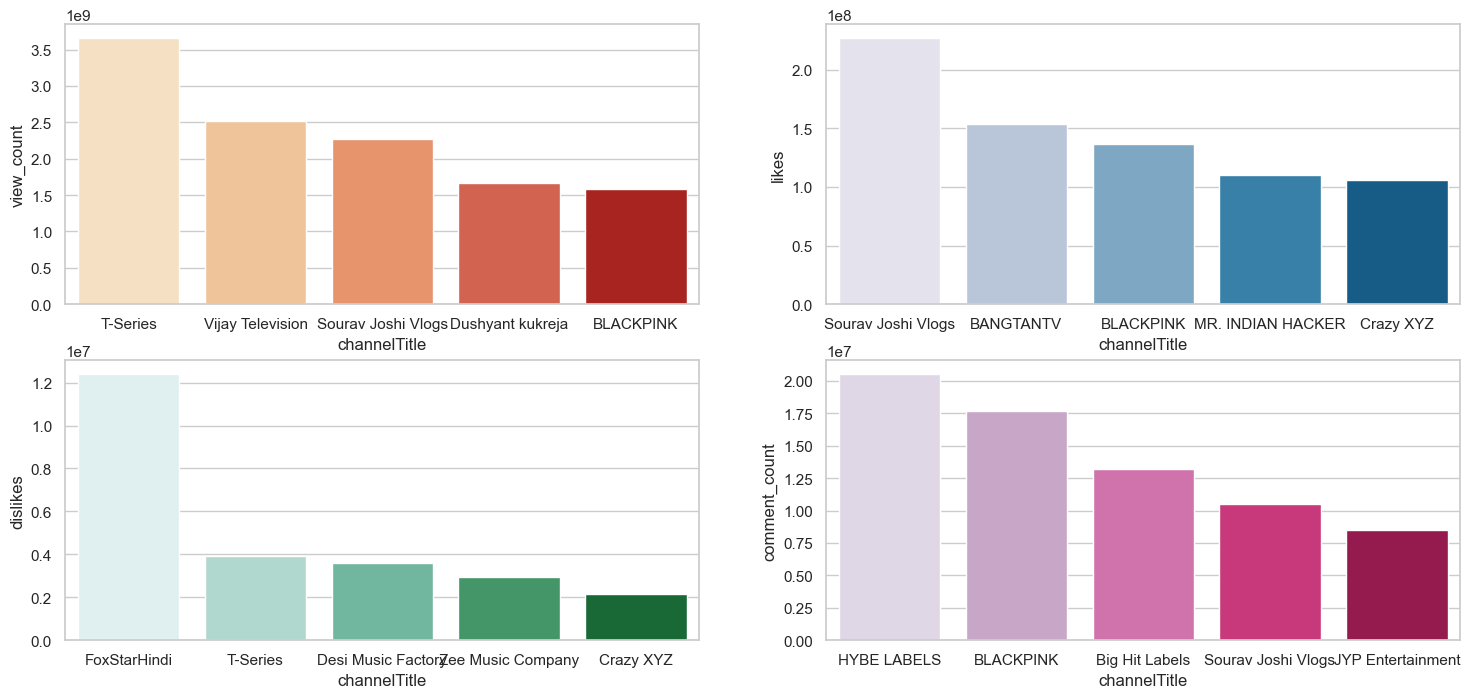

In [26]:
# Plotting the 5 channels with the largest view count, likes, dislikes, comment count
plt.figure(figsize = (18, 8))
plt.subplot(2, 2, 1)

var_list = ['view_count', 'likes', 'dislikes', 'comment_count']
palette_plot = ['OrRd', 'PuBu', 'BuGn', 'PuRd']

for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x, y = y, palette = palette_plot[i])
    

### 2. Most watched category

In [27]:
category_group_df = df.groupby(by = df['video_category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
video_category,,,,,,,
Anime/Animation,23936,3482502838,104359978,2254845,5221882,3,2
Autos & Vehicles,897,2917790934,94689221,3255250,4240977,5,5
Classics,6118,563982994,41327903,327773,1317236,2,1
Comedy,104940,35250173074,1855464728,37911989,180927951,18,62
Drama,167486,20668324845,1315410304,11837539,31107139,91,192
Family,77579,9904109894,669315492,7535813,18496941,24,31
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105
Horror,39475,1541970716,29470756,3153409,3034702,70,144
Music,550,421685808,20910828,427127,419151,1,2


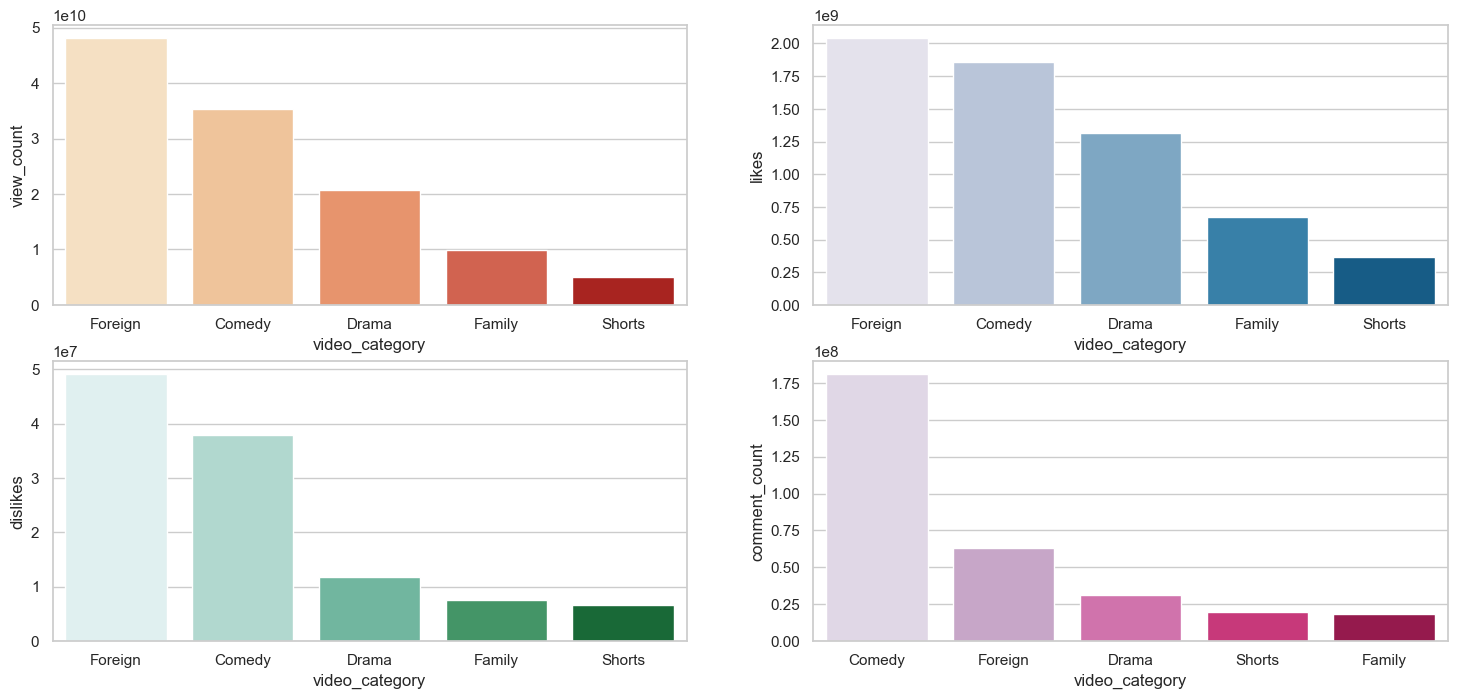

In [28]:
# Plotting the 5 categories with the largest view count, likes, dislikes, comment count
plt.figure(figsize = (18, 8))
plt.subplot(2, 2, 1)

var_list = ['view_count', 'likes', 'dislikes', 'comment_count']
palette_plot = ['OrRd', 'PuBu', 'BuGn', 'PuRd']

for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    x = category_group_df[var_list[i]].nlargest(5).index
    y = category_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x, y = y, palette = palette_plot[i])
    

### 4. Least watched category

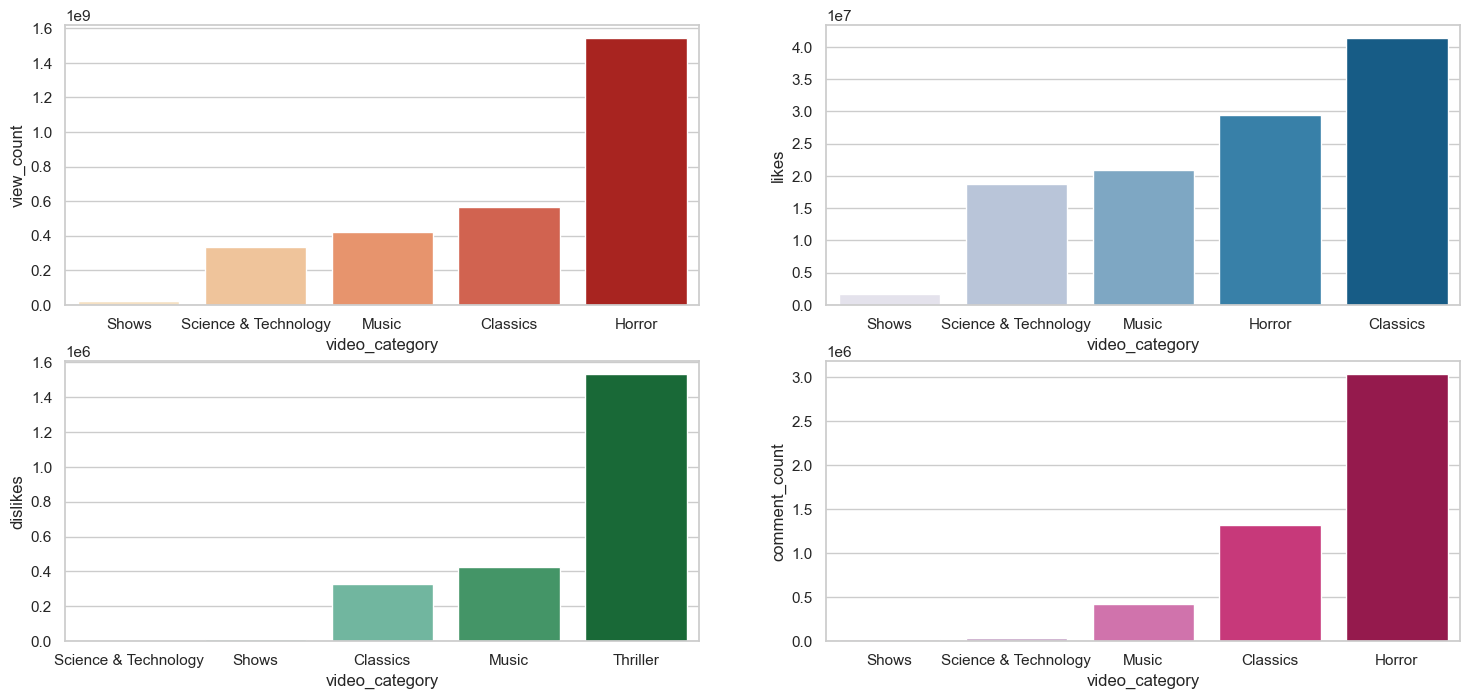

In [29]:
# Plotting the 5 categories with the largest view count, likes, dislikes, comment count
plt.figure(figsize = (18, 8))
plt.subplot(2, 2, 1)

var_list = ['view_count', 'likes', 'dislikes', 'comment_count']
palette_plot = ['OrRd', 'PuBu', 'BuGn', 'PuRd']

for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x, y = y, palette = palette_plot[i])
    

## Some analysis to the data

But is that right way of analysis?

Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
Does highest views say that the public are highly interested in watching those Category videos?
Let's dive deep further to understand even more

Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [30]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)
df_Views_Analysis

,video_category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,12186630680,369313527,8629613,3.10
1,Autos & Vehicles,12055118546,398793665,17947353,3.46
2,Classics,1511253586,112632252,1120720,7.53
3,Comedy,143340756819,8080245680,177051790,5.76
4,Drama,70895963599,4429654711,42096807,6.31
5,Family,37809207717,2692394026,35932244,7.22
6,Foreign,161792603376,7430412774,252917844,4.75
7,Horror,4662550702,93181650,11369553,2.24
8,Music,1474112665,76128518,1563769,5.27
9,Sci-Fi/Fantasy,8270798364,479289446,7909164,5.89


Text(0, 0.5, 'Public Response(in percentage)')

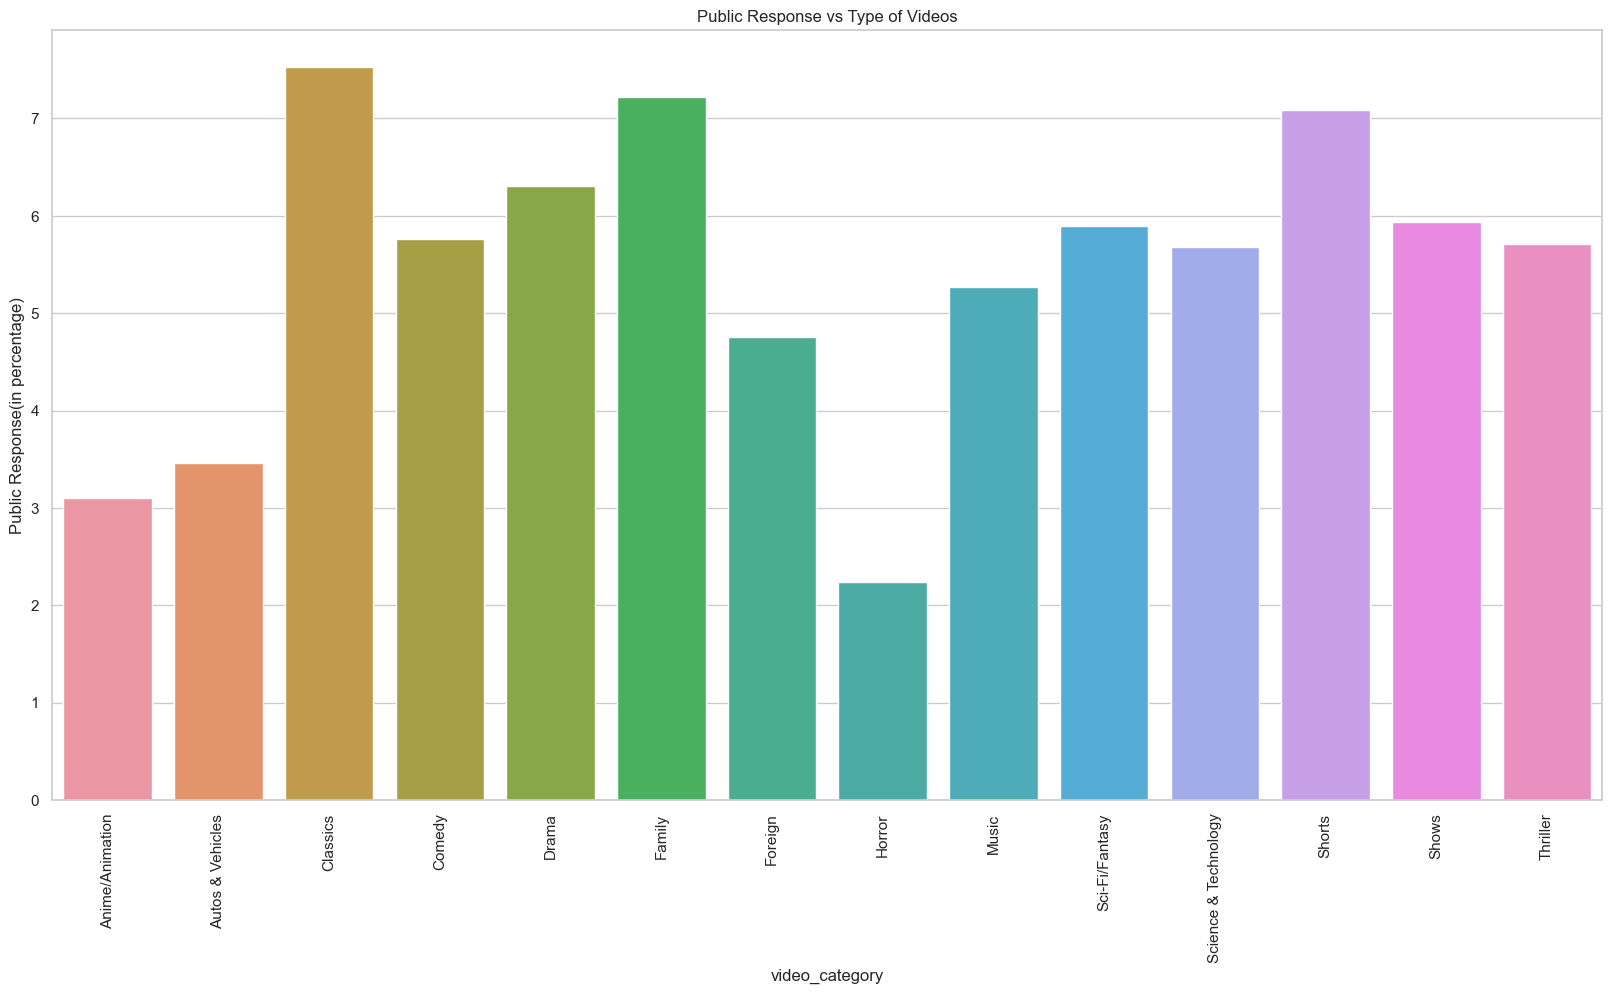

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.video_category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

In [32]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,video_category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,12186630680,369313527,8629613,3.10,3.030481,0.070812,18270342,0.149921
1,Autos & Vehicles,12055118546,398793665,17947353,3.46,3.308086,0.148877,20336223,0.168694
2,Classics,1511253586,112632252,1120720,7.53,7.452902,0.074158,3704214,0.245109
3,Comedy,143340756819,8080245680,177051790,5.76,5.637089,0.123518,910413911,0.635140
4,Drama,70895963599,4429654711,42096807,6.31,6.248106,0.059378,103496171,0.145983
5,Family,37809207717,2692394026,35932244,7.22,7.121001,0.095036,91314070,0.241513
6,Foreign,161792603376,7430412774,252917844,4.75,4.592554,0.156322,271440773,0.167771
7,Horror,4662550702,93181650,11369553,2.24,1.998512,0.243848,10187179,0.218489
8,Music,1474112665,76128518,1563769,5.27,5.164362,0.106082,1245472,0.084490
9,Sci-Fi/Fantasy,8270798364,479289446,7909164,5.89,5.794960,0.095628,12042408,0.145602


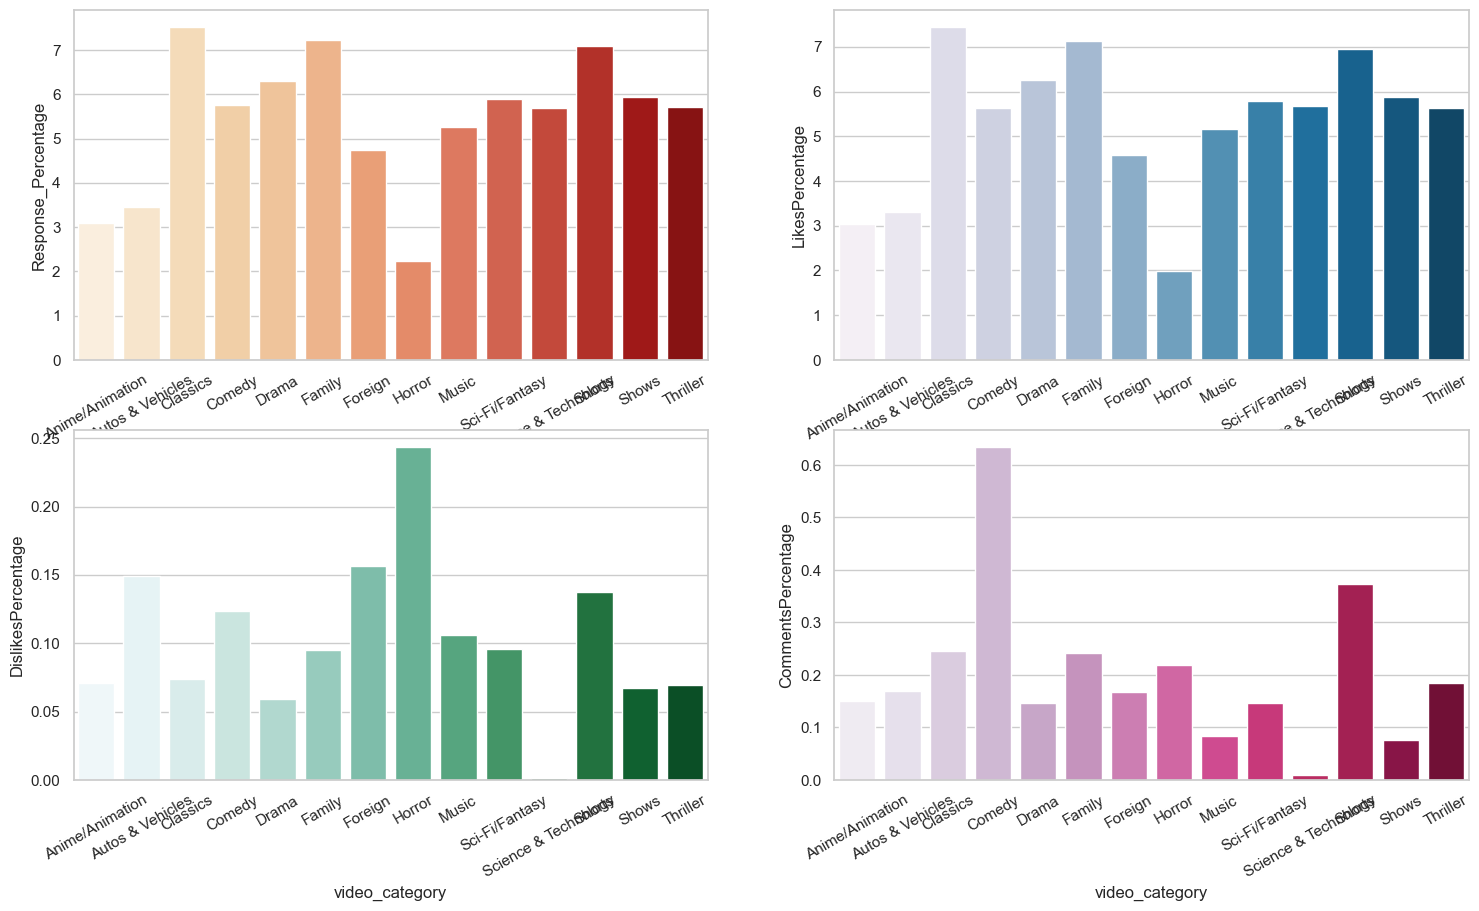

In [33]:
# Plotting the 5 categories with the largest view count, likes, dislikes, comment count
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)

var_list = ['Response_Percentage', 'LikesPercentage', 'DislikesPercentage', 'CommentsPercentage']
palette_plot = ['OrRd', 'PuBu', 'BuGn', 'PuRd']

for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    x = df_Views_Analysis['video_category']
    y = df_Views_Analysis[var_list[i]].sort_values()
    sns.barplot(x = x, y = y, palette = palette_plot[i])
    # Rotating X-axis labels
    plt.xticks(rotation = 30)

## Channel Analysis

In [34]:
df_Channel = df_MaxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_MaxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_MaxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_MaxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
1211,Govind's Thought Shorts,50936646,3731877,27815,18892
1769,MEDIA MARATHI,1367009,10339,1934,449
1431,JISMA & VIMAL,128516555,10007213,0,164963
2225,Noel,3836995,300393,20284,11518
1753,MAKE JOKE HORROR,29544447,819348,66753,49483
263,Anand Narayan,2472750,35002,1398,1706
1418,It's Factz,17401037,307305,33810,142312
746,D Jackson,81307420,8384388,0,8668
3137,Suraj Kumar,6709520,544996,4536,58366
883,Divin prabhakaran,1668675,143788,2466,4045


In [35]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,17027261016,524589196,19769202,36892440
443,BLACKPINK,7804311638,702908065,11243778,108969955
917,Dushyant kukreja,6515990756,394124849,6975973,1388743
3027,Sourav Joshi Vlogs,5524265842,582352465,2664465,28189688
2041,MrBeast,5104377705,358780579,2282644,20782574
3624,Vijay Television,4551901413,99589964,1591383,5096579
3009,Sony Music India,4453076921,106743327,4120643,14557822
1261,HYBE LABELS,4332459099,507281287,2137190,102579012
519,Big Hit Labels,4002655164,391409833,8875608,100843852
417,BANGTANTV,3899834491,600182326,3539781,25838993


## Channel vs total views

Text(0, 0.5, 'Total Views')

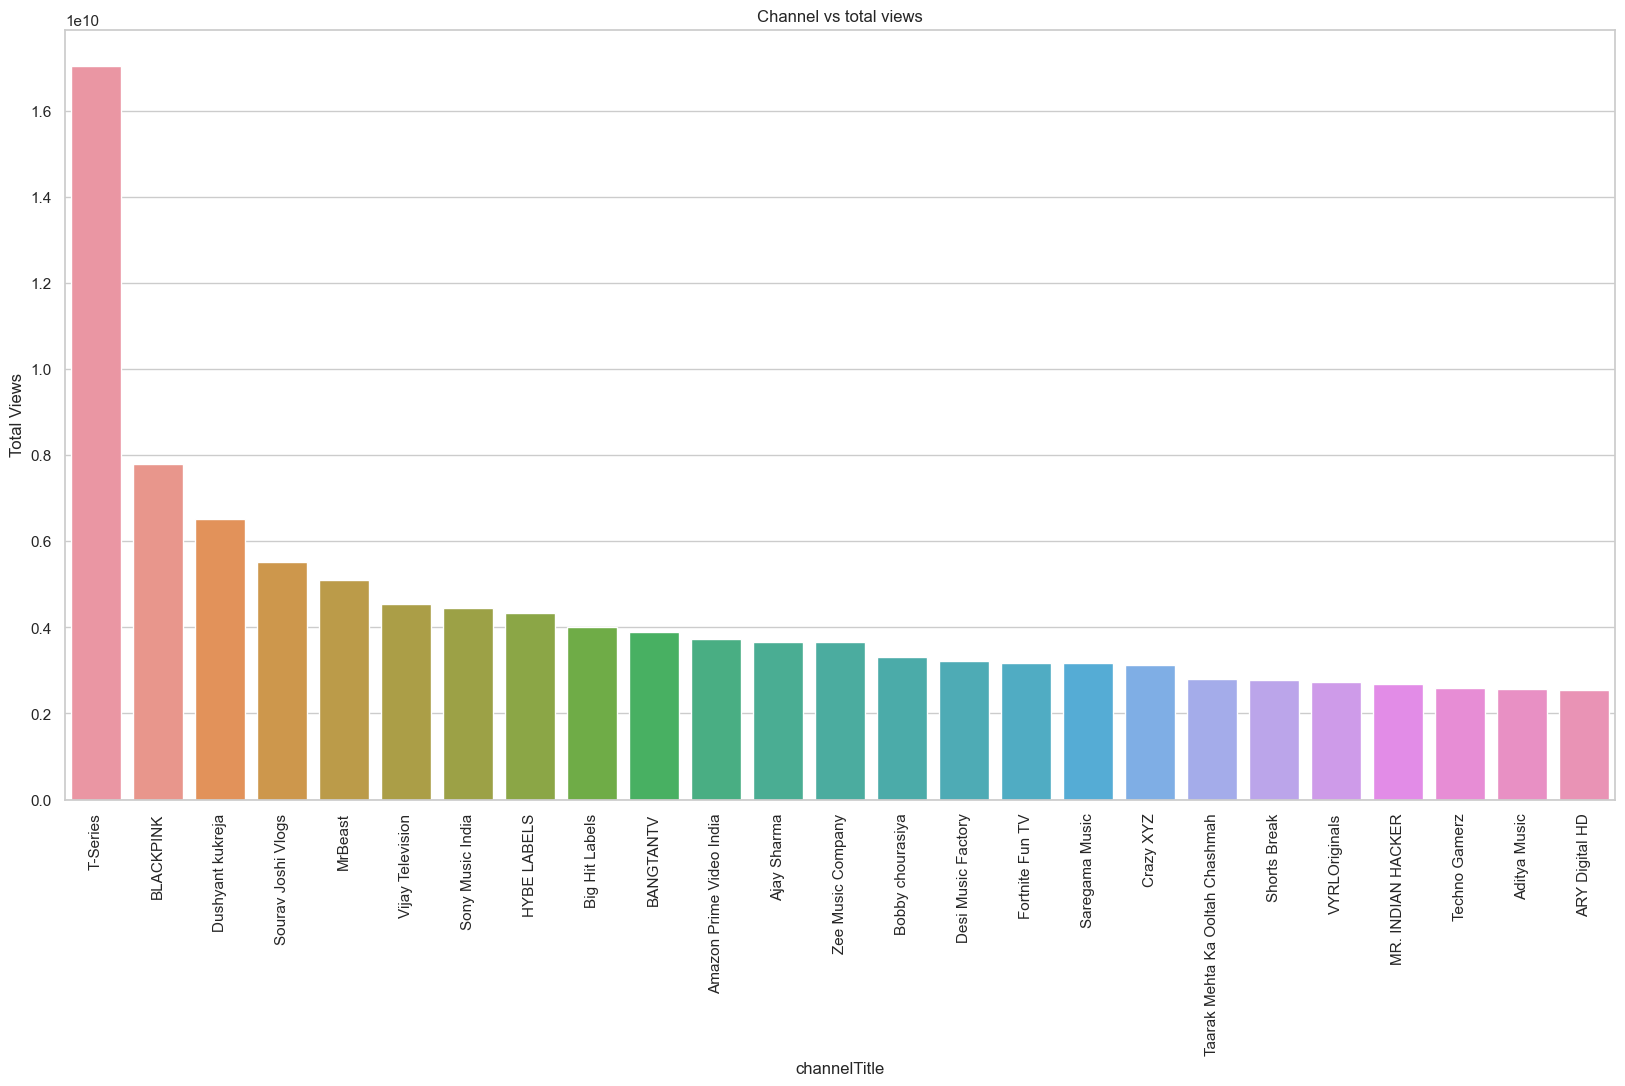

In [36]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

## Channel vs total likes

Text(0, 0.5, 'Total Likes')

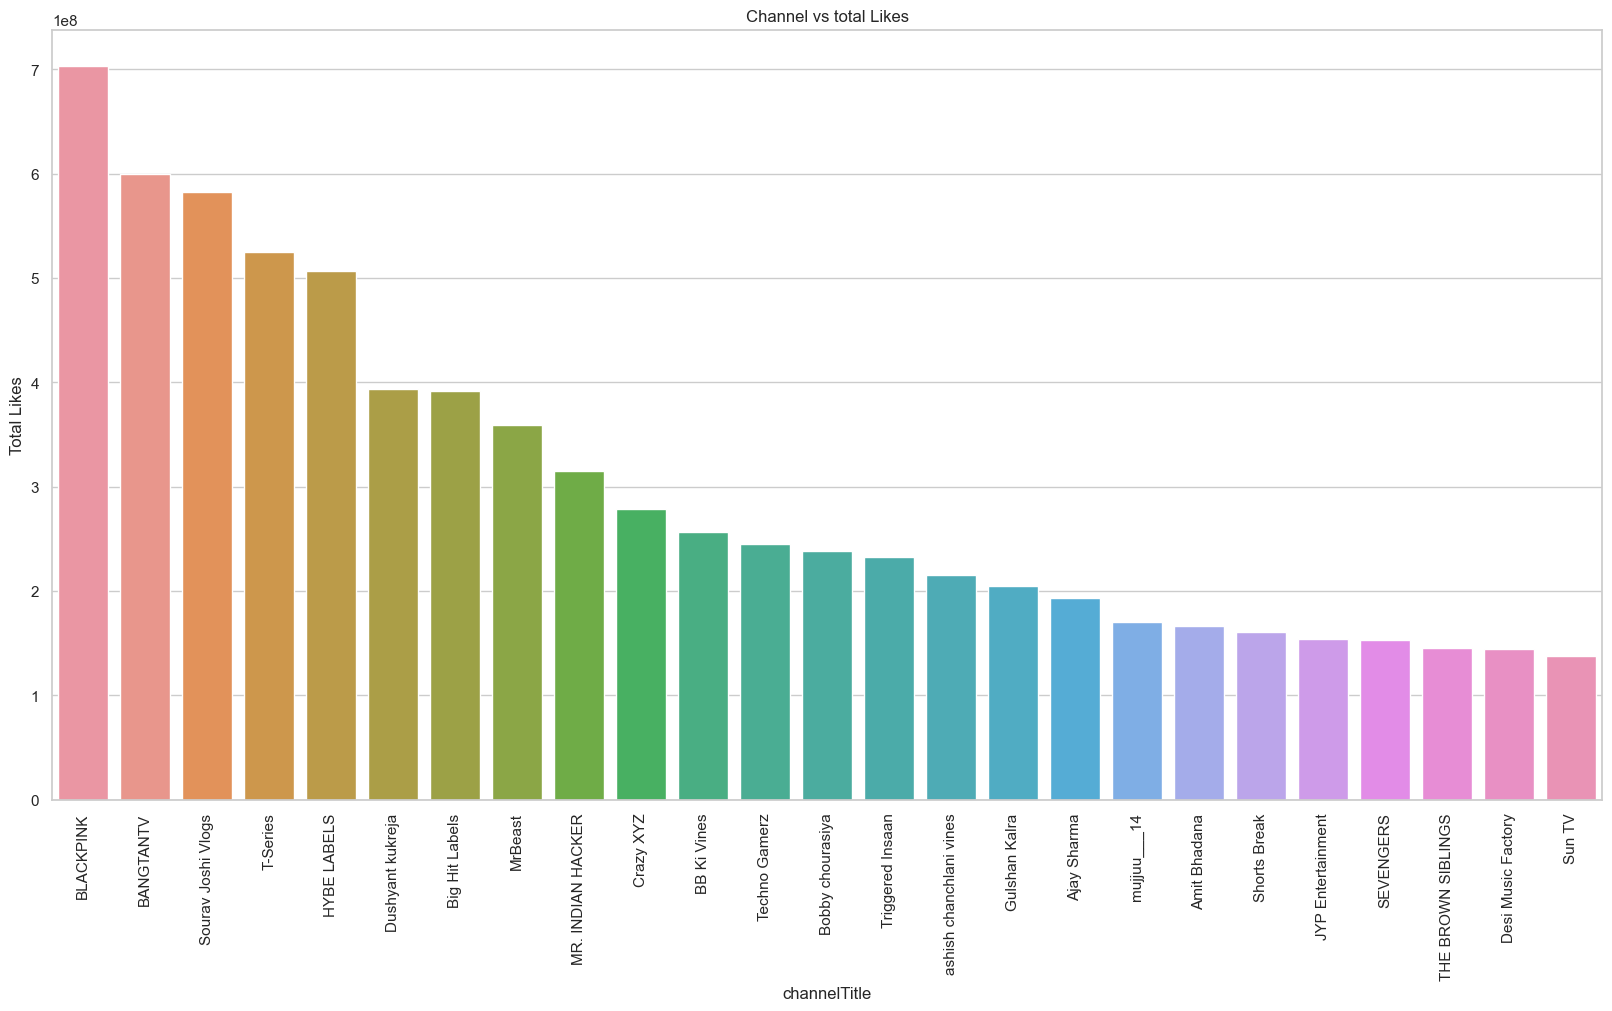

In [37]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


## Channel vs total comments

Text(0, 0.5, 'Total Comments')

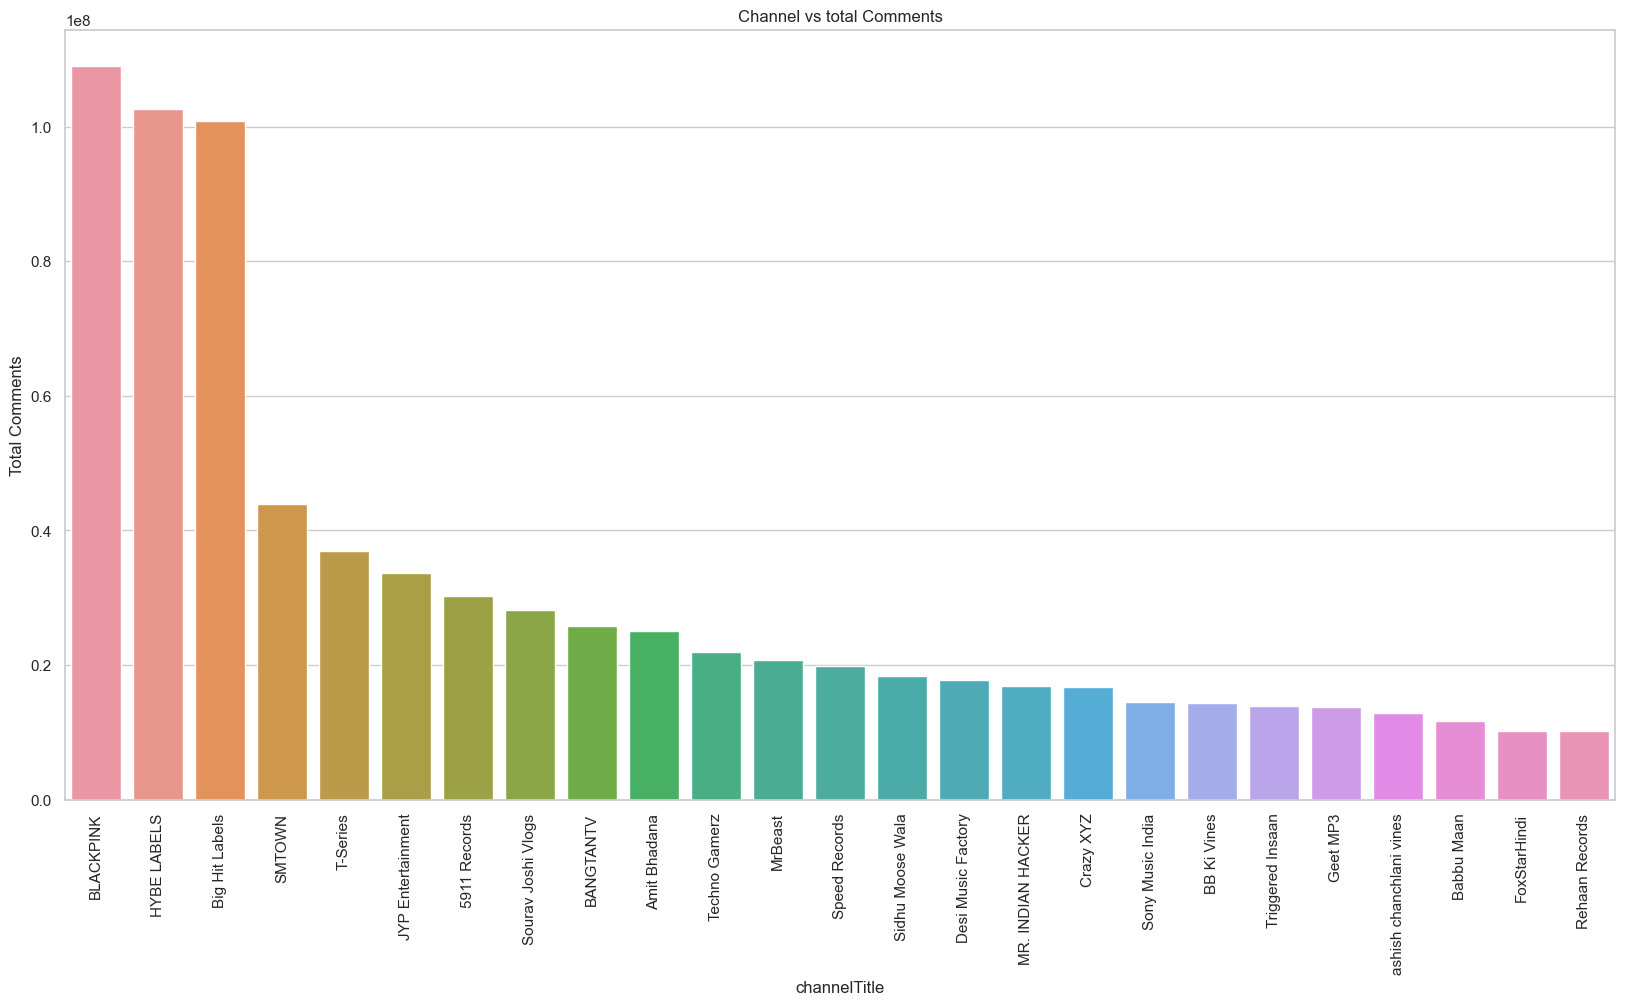

In [38]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

## FURTHER ANALYSIS :: Student Assignment

1) Which category of videos have comments disabled ?

2) Which category of videos have ratings disabled ?

3) Most watched video in India overall | Year wise | Category wise

4) Yearwise number of Videos published which were trending

5) Distributions of Numerical Columns

6) View the correlations between the numerical variables

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships

### 1. Which category of videos have comments disabled ?

In [96]:
df_comments_disabled = df.loc[df['comments_disabled'] == True]
plot_comments = df_comments_disabled.iloc[:, -1].value_counts()

In [97]:
plot_comments = pd.DataFrame(plot_comments)
plot_comments.reset_index(inplace = True)

In [103]:
plot_comments = plot_comments.rename(columns = {'index':'categories'})
plot_comments

,categories,video_category
0,Foreign,157
1,Drama,91
2,Horror,70
3,Shorts,47
4,Family,24
5,Comedy,18
6,Autos & Vehicles,5
7,Sci-Fi/Fantasy,5
8,Anime/Animation,3
9,Thriller,2


### 2. Which category of videos have ratings disabled ?

In [109]:
df_rating_disabled = df.loc[df['ratings_disabled'] == True]
plot_rating = df_rating_disabled.iloc[:, -1].value_counts()

In [110]:
plot_rating = pd.DataFrame(plot_rating)
plot_rating.reset_index(inplace = True)

In [115]:
plot_rating = plot_rating.rename(columns = {'index':'categories', 'video_category':'rating'})
plot_rating

,categories,rating
0,Drama,192
1,Horror,144
2,Foreign,105
3,Comedy,62
4,Family,31
5,Sci-Fi/Fantasy,13
6,Thriller,6
7,Autos & Vehicles,5
8,Anime/Animation,2
9,Music,2


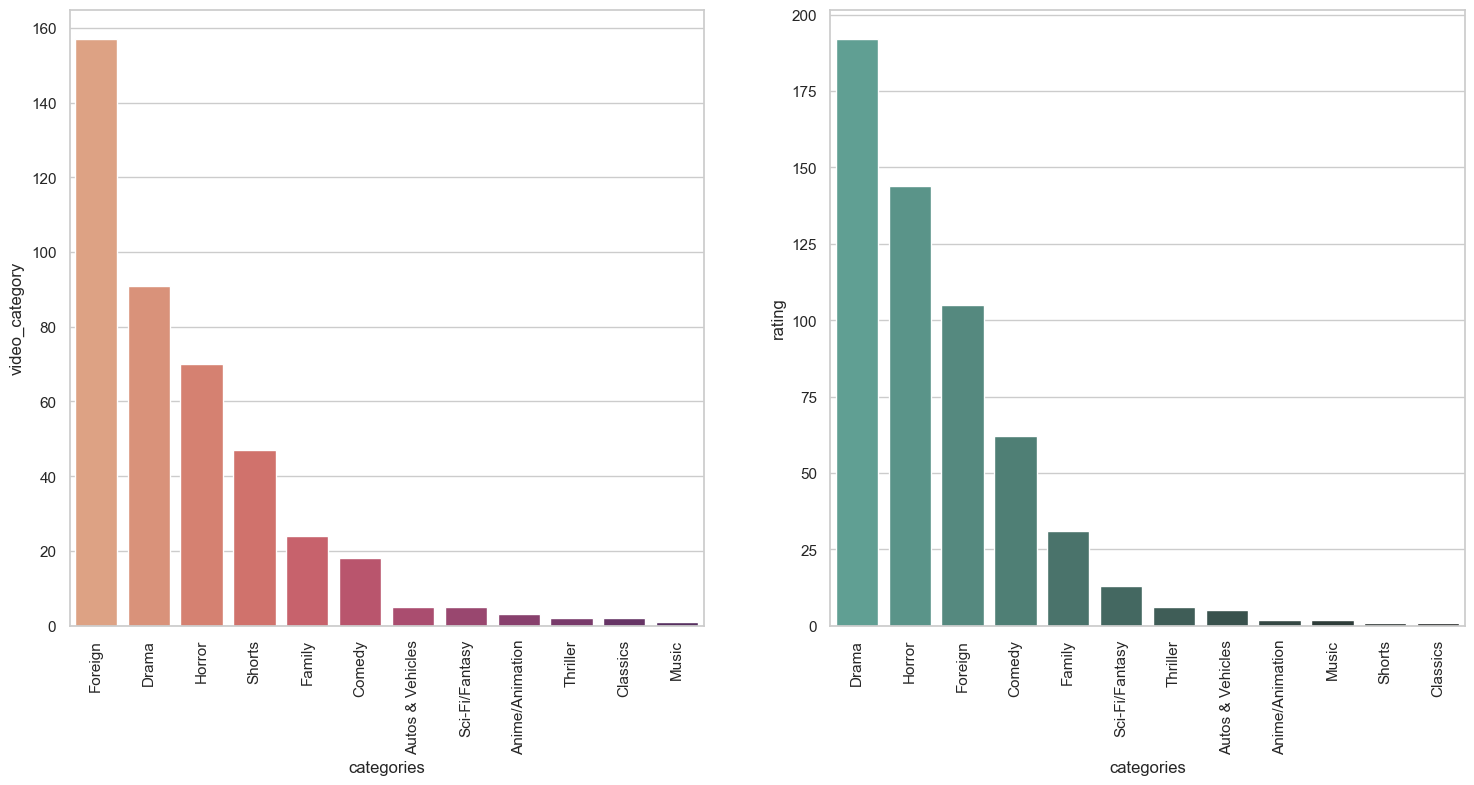

In [129]:
palette_color = ['flare', 'dark:#5A9_r']

plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)

for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    if i == 0:
        x = plot_comments['categories']
        y = plot_comments['video_category']
    else:
        x = plot_rating['categories']
        y = plot_rating['rating']
        
    plt.xticks(rotation = 90)
    sns.barplot(x = x, y = y, palette = palette_color[i])

### 3. Most watched video in India overall

In [173]:
df

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_category
90,n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,2020-08-11 13:20:54+00:00,Little Talks,24,2020-08-12 00:00:00+00:00,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,Foreign
91,lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,2020-08-11 11:30:09+00:00,Marathi Tadka,24,2020-08-12 00:00:00+00:00,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,Foreign
115,ABrm1mQXj38,IPL 2020 - Patanjali IPL As Sponsor With 10 Bi...,2020-08-10 14:15:01+00:00,MY Cricket Production,17,2020-08-12 00:00:00+00:00,IPL|ipl 2020|ipl auction 2020|my cricket produ...,84754,11941,447,1862,False,False,Watch the 31st episode of IPL Ki Baat & Cricke...,Anime/Animation
116,nhO6cINEDs4,Gaadi Parking | Mirchi Murga | RJ Naved,2020-08-10 13:57:24+00:00,Mirchi Murga,23,2020-08-12 00:00:00+00:00,rj naved Mirchi murga latest|rj naved|Mirchi M...,395007,25223,429,946,False,False,RJ Naved and RJ Sayema together in a Murga! Ca...,Family
118,aUTu0cjX4Uw,FilterCopy | When Your Younger Sister Starts D...,2020-08-08 07:00:12+00:00,FilterCopy,23,2020-08-12 00:00:00+00:00,filtercopy|filtercopy ahsaas|ahsaas channa|ahs...,1836252,91361,2883,2810,False,False,You’re dating my sister? Hold on there bro ✋🏻T...,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152588,P1sAzjdFaAQ,I STARTED A CONSTRUCTION COMPANY,2022-10-06 03:30:06+00:00,Techno Gamerz,20,2022-10-10 00:00:00+00:00,construction simulator|building|repairing|funn...,4658519,305976,0,13257,False,False,I STARTED A CONSTRUCTION COMPANYSubscribe to o...,Comedy
152589,wNNM525464o,Gabbar ने दिया Hospital चलने वालों को मुंहतोड़...,2022-10-04 05:30:18+00:00,Viacom18 Studios,24,2022-10-10 00:00:00+00:00,gabbar is back|gabbar is back hindi movie|gabb...,900992,8781,0,77,False,False,Gabbar ने दिया Hospital चलने वालों को मुंहतोड़...,Foreign
152590,dsy0ogwdiZg,Ekkar Banegi Body Part 1 | Gym | ibrahim 420,2022-10-04 14:31:39+00:00,Ibrahim 420,23,2022-10-10 00:00:00+00:00,ibrahim 420|ibrahim420|ibrahim 420 new video|a...,599175,36900,0,1302,False,False,https://probo-in.onelink.me/1kre/ibrahim420oct...,Family
152591,hQRxcSDRnWw,Shakti | शक्ति | Ep. 611 | Harman Is Attacked,2022-10-08 10:30:58+00:00,Colors Rishtey,24,2022-10-10 00:00:00+00:00,Shakti|shakti serial|shakti Vivian De Sena|sha...,557794,5766,0,80,False,False,To download the Voot app please click on the l...,Foreign


In [186]:
india_most_watched = df_MaxViews.loc[df_MaxViews['video_category'] == 'Foreign']
india_most_watched = india_most_watched.groupby('channelTitle')["view_count"].sum()
india_most_watched.loc[india_most_watched == india_most_watched.sort_values(ascending = False).max()]

channelTitle
Dushyant kukreja    6515990756
Name: view_count, dtype: int64

### 5. Distributions of Numerical Columns

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46836 entries, 90 to 152592
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           46836 non-null  object             
 1   title              46836 non-null  object             
 2   publishedAt        46836 non-null  datetime64[ns, UTC]
 3   channelTitle       46836 non-null  object             
 4   categoryId         46836 non-null  int64              
 5   trending_date      46836 non-null  datetime64[ns, UTC]
 6   tags               46836 non-null  object             
 7   view_count         46836 non-null  int64              
 8   likes              46836 non-null  int64              
 9   dislikes           46836 non-null  int64              
 10  comment_count      46836 non-null  int64              
 11  comments_disabled  46836 non-null  bool               
 12  ratings_disabled   46836 non-null  bool     

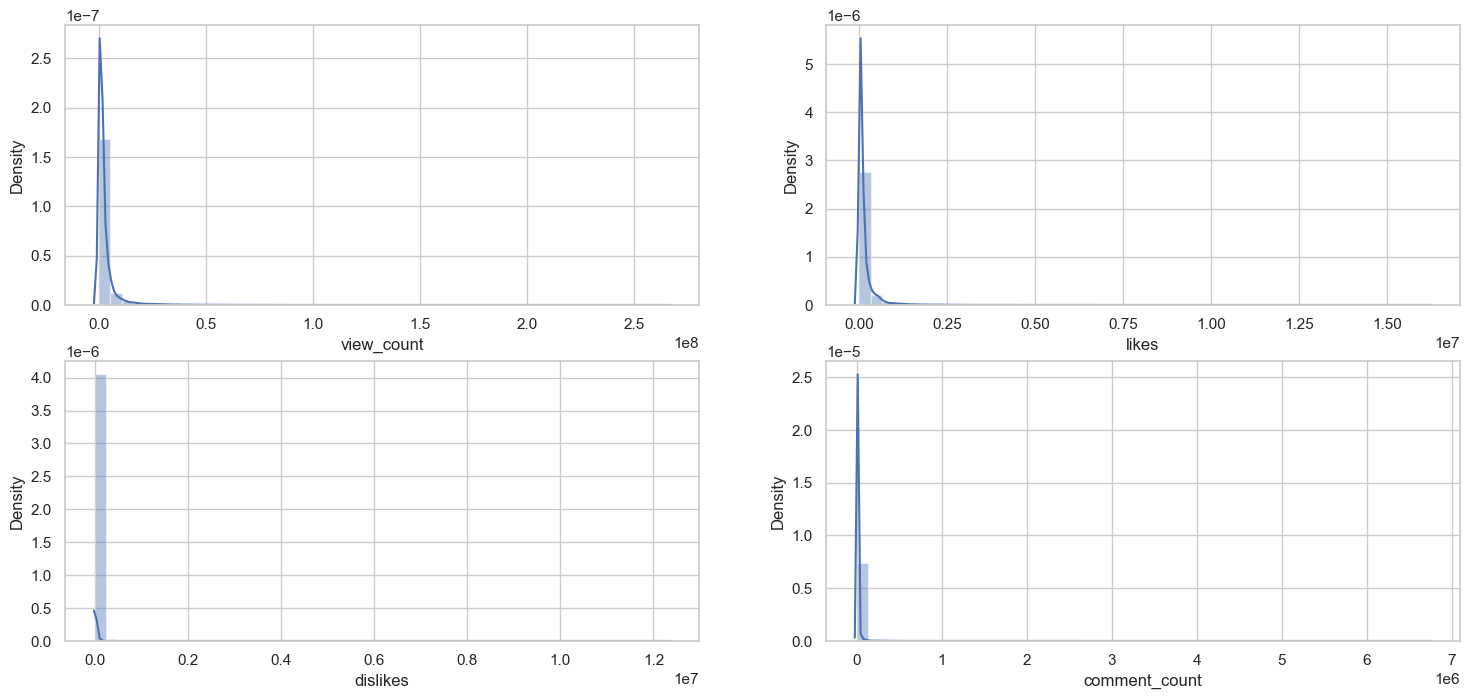

In [142]:
numerical_variables = ['view_count', 'likes', 'dislikes', 'comment_count']

plt.figure(figsize = (18, 8))
plt.subplot(2, 2, 1)


for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    sns.distplot(df[numerical_variables[i]])

### 6. View the correlations between the numerical variables

In [148]:
corr_df = df.corr()

In [153]:
corr_coef = np.corrcoef(corr_df)
corr_coef

array([[ 1.        , -0.56990834, -0.5228514 , -0.24518268, -0.53077992,
        -0.05257967, -0.07731497],
       [-0.56990834,  1.        ,  0.96682143, -0.03567796,  0.71253053,
        -0.34333086, -0.35352813],
       [-0.5228514 ,  0.96682143,  1.        , -0.0808825 ,  0.78470424,
        -0.35599221, -0.40655639],
       [-0.24518268, -0.03567796, -0.0808825 ,  1.        ,  0.01696468,
        -0.25130016, -0.25152711],
       [-0.53077992,  0.71253053,  0.78470424,  0.01696468,  1.        ,
        -0.37299338, -0.36932265],
       [-0.05257967, -0.34333086, -0.35599221, -0.25130016, -0.37299338,
         1.        , -0.11386952],
       [-0.07731497, -0.35352813, -0.40655639, -0.25152711, -0.36932265,
        -0.11386952,  1.        ]])

In [169]:
cols = corr_df.columns.values
cols = list(cols)
cols

['categoryId',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled']

<Axes: >

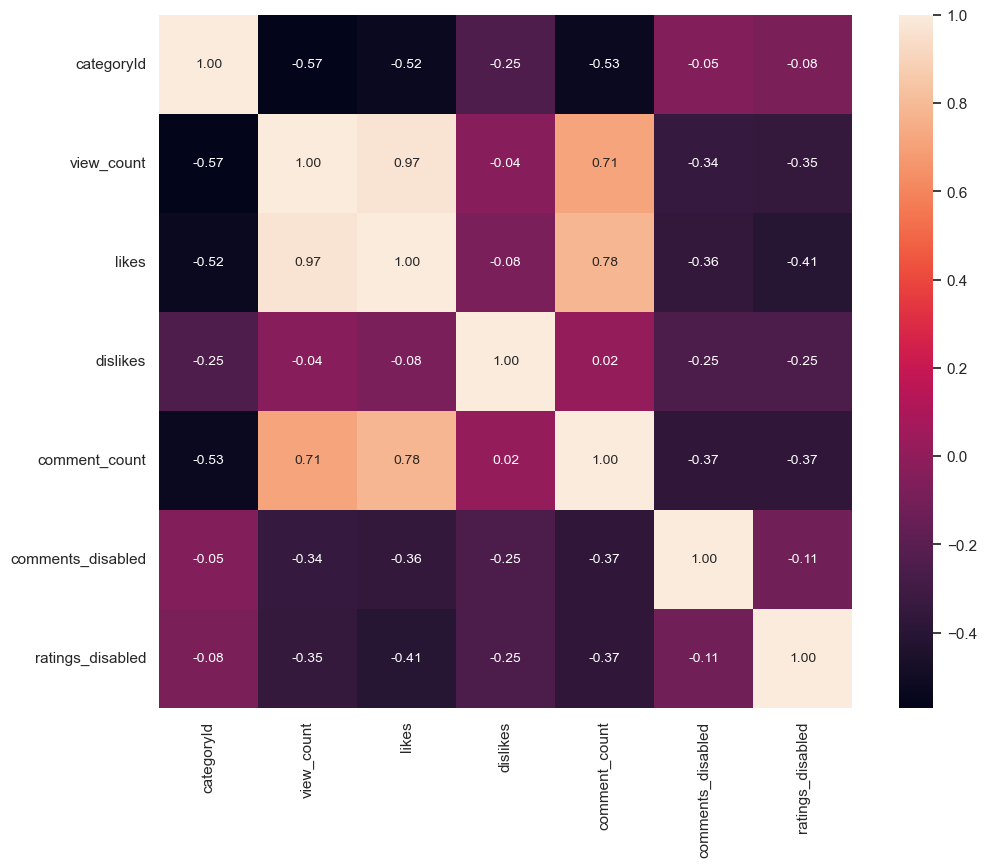

In [171]:
plt.subplots(figsize = (12, 9))
sns.heatmap(corr_coef, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size":10,}, \
           yticklabels = cols, xticklabels = cols)

### 7. Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships

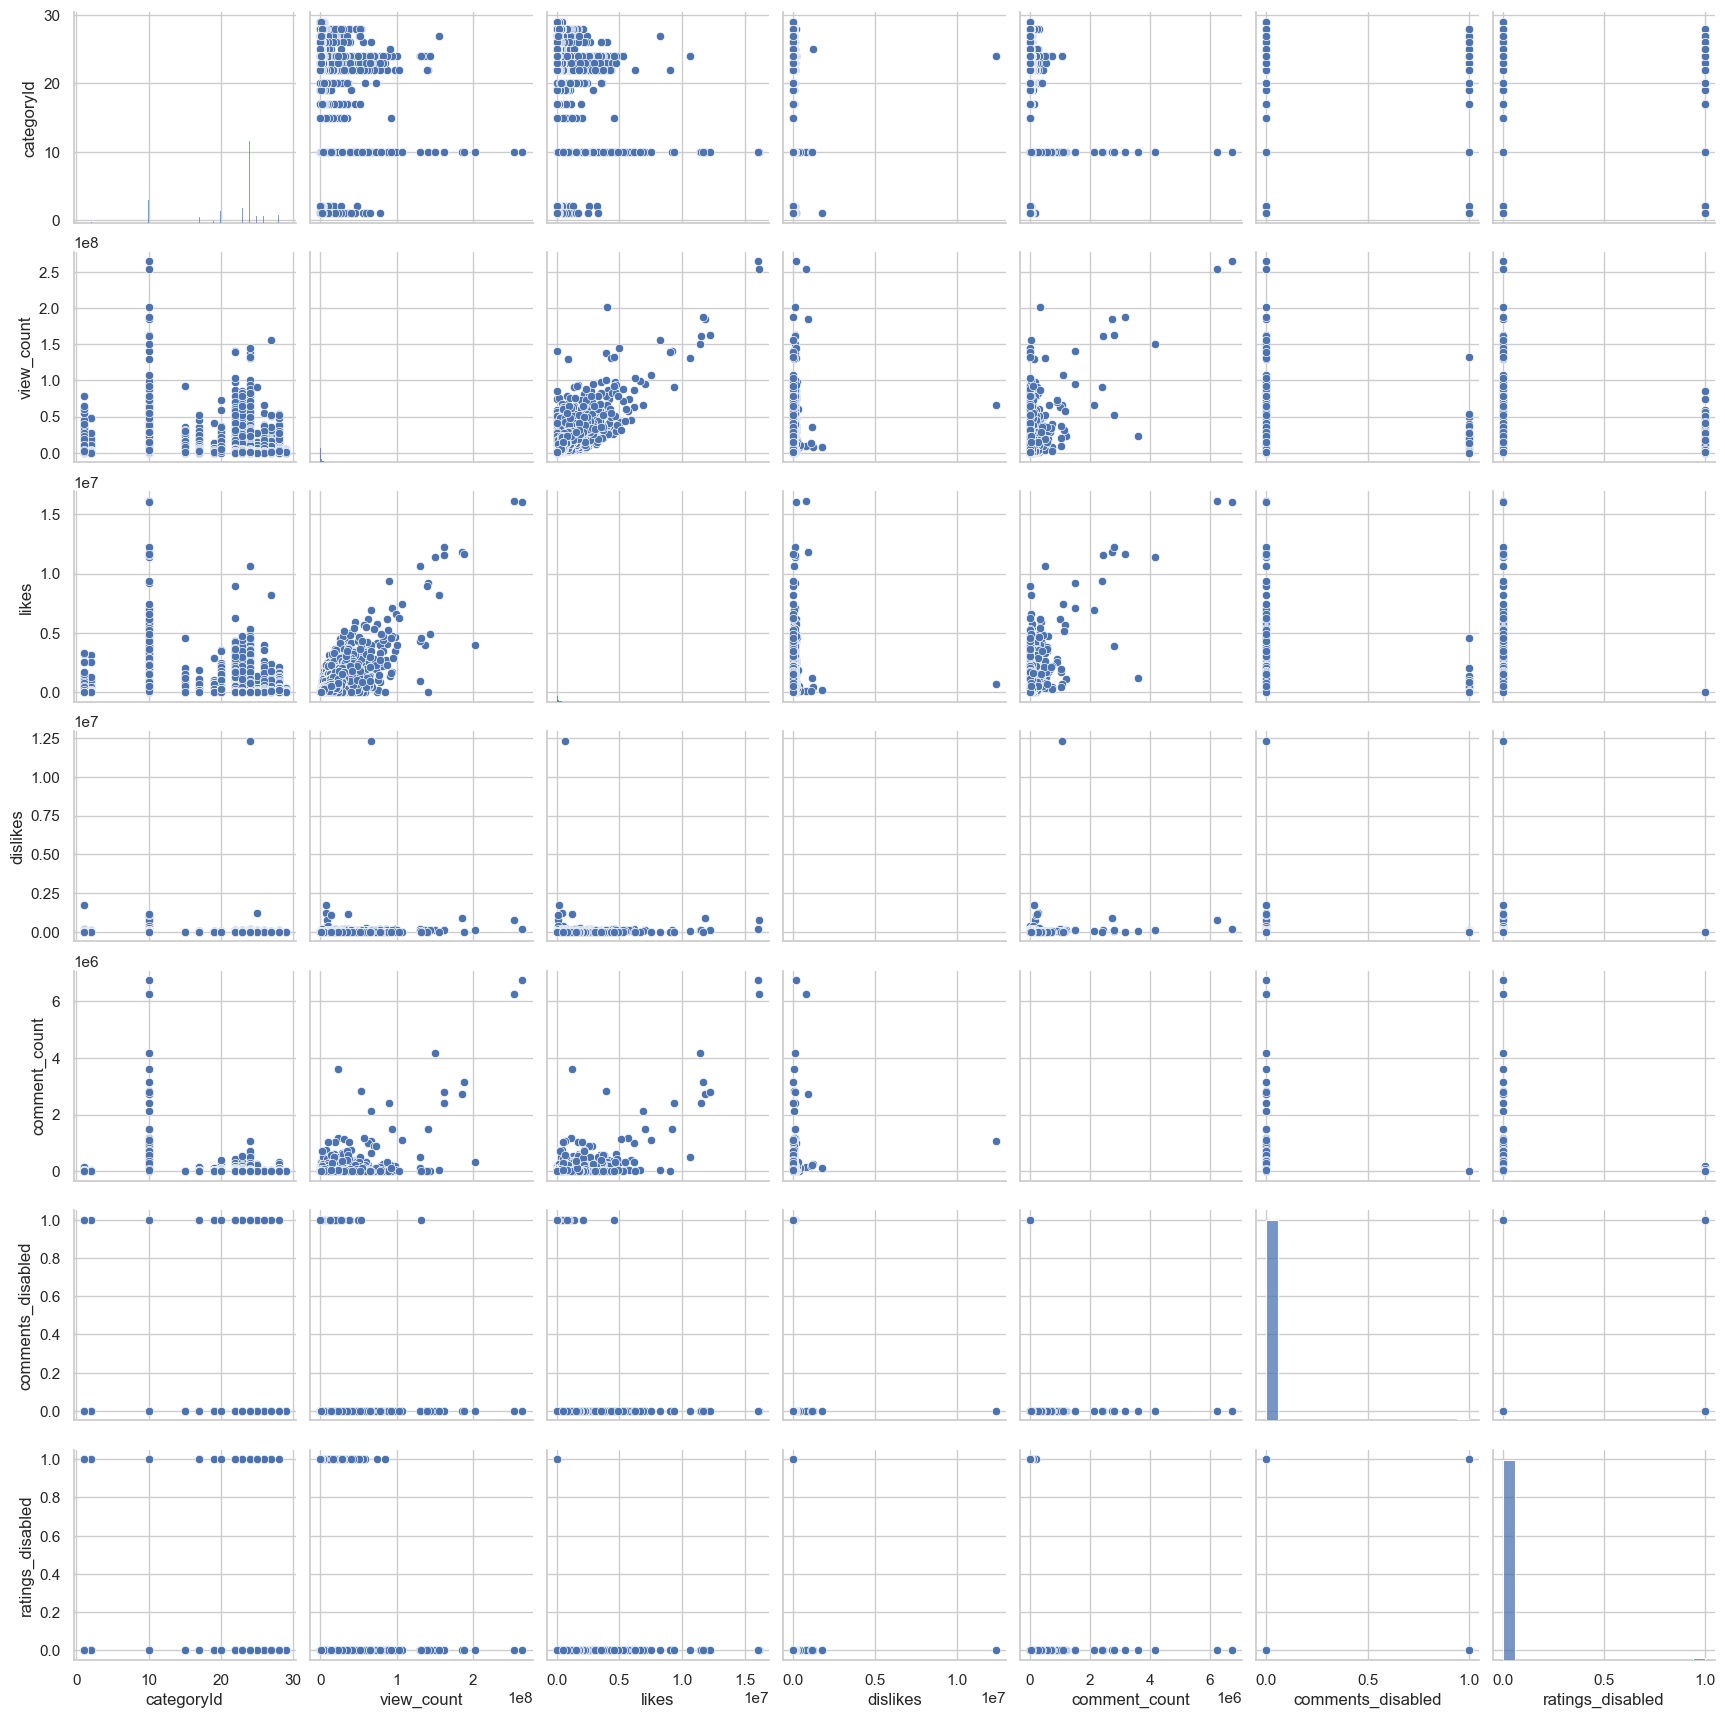

In [172]:
sns.pairplot(df, height = 2.5)
plt.show()